**Bank Customer Churn Prediction(Classification project)**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

In [3]:
# Loading Dataset
df = pd.read_csv("/content/drive/MyDrive/Machine Learning/DS3_C6_S2_Classification_BankChurn_Data_Project.csv")
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#Checking for shape
df.shape

(10000, 13)

In [5]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [6]:
# Summarizing the data
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
# Checking for null values
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
# Replacing the wrongly spelled
df['Geography']=df['Geography'].replace(['fra'],'France')
df['Geography']=df['Geography'].replace(['espanio'],'Spain')
df['Geography']=df['Geography'].replace(['ger'],'Germany')
df['Geography']=df['Geography'].replace(['spain'],'Spain')
df['Geography']=df['Geography'].replace(['germany'],'Germany')
df['Geography']=df['Geography'].replace(['gernamy'],'Germany')
df['Geography']=df['Geography'].replace(['GERMANY'],'Germany')
df['Geography']=df['Geography'].replace(['france'],'France')

In [ ]:
# Checking for noise values
# function for noise values in each categorical data

for cols in list(df.columns):
    print(round(df[cols].value_counts()))
    print("---------------------------")

15634602    1
15667932    1
15766185    1
15667632    1
15599024    1
           ..
15599078    1
15702300    1
15660735    1
15671390    1
15628319    1
Name: CustomerId, Length: 10000, dtype: int64
---------------------------
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64
---------------------------
850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: CreditScore, Length: 460, dtype: int64
---------------------------
France     5001
Germany    2502
Spain      2469
france        7
espanio       6
fra           6
ger           4
spain         2
germany       1
gernamy       1
GERMANY       1
Name: Geography, dtype: int64
---------------------------
Male      5457
Female    4543
Name: Gender, dtype: int64
---------------------------
37    478
38    477
35  

In [ ]:
df1=df.copy()

In [ ]:
df.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
#Label Encoding

df1.Geography=df1.Geography.astype('category')
df1.Gender=df1.Gender.astype('category')


label_encoder = preprocessing.LabelEncoder()
df1['Geography']=label_encoder.fit_transform(df1['Geography'])
df1['Gender']=label_encoder.fit_transform(df1['Gender'])


In [ ]:
# Dropping the custmer id col:
df1.drop(['CustomerId'],axis=1,inplace = True)

**EDA**

---> Univariate Analysis:

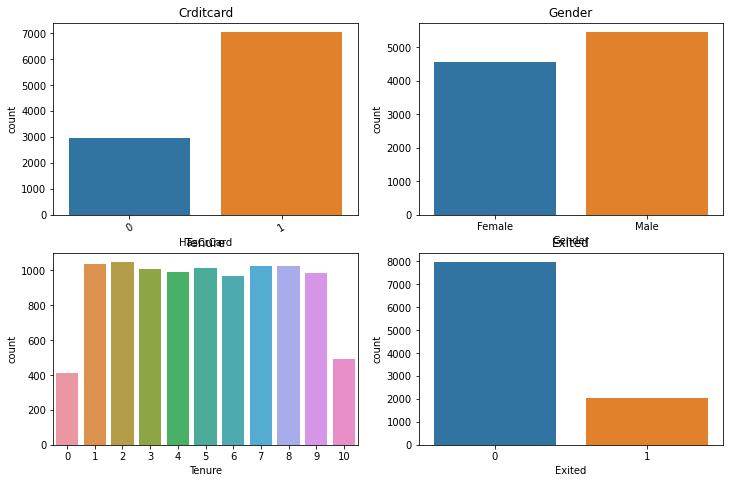

In [ ]:
plt.figure(figsize=(12,12))
plt.subplot(321)
sns.countplot(data=df,x=df['HasCrCard'])
plt.xticks(rotation='30')
plt.title("Crditcard")

plt.subplot(322)
sns.countplot(data=df,x=df['Gender'])
plt.title("Gender")

plt.subplot(323)
sns.countplot(data=df,x='Tenure')
plt.title("Tenure")

plt.subplot(324)
sns.countplot(data=df,x='Exited')
plt.title("Exited")
plt.show()

**Conclusion:**
from the graphs we can observe that in the plots the customers who have credit card are high in number,in gender males are high in number,in tenure 2 has the highest count ,and the customers who are leaving the company are in low count when compared to customers who are not leaving the company.

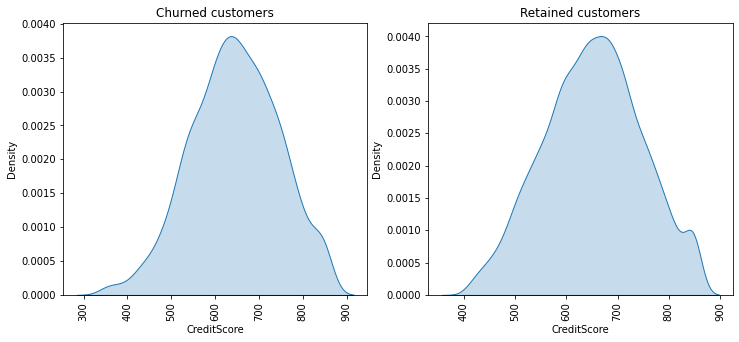

In [ ]:
# creditscore of customers:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.kdeplot(data=df[df['Exited']==1],x='CreditScore',shade=True)
plt.xticks(rotation='90')
plt.title("Churned customers")

plt.subplot(122)
sns.kdeplot(data=df[df['Exited']==0],x='CreditScore',shade=True)
plt.xticks(rotation='90')
plt.title("Retained customers")

plt.show()

From the plots we can say that the plots were left skewed.

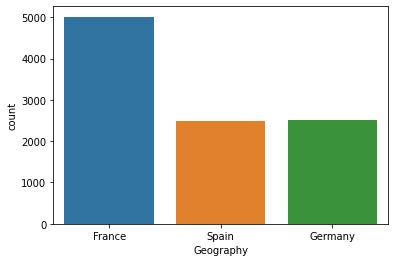

In [10]:
sns.countplot(data=df,x='Geography')

From the plot we can say that France has high count

---->Bivariate Analysis:

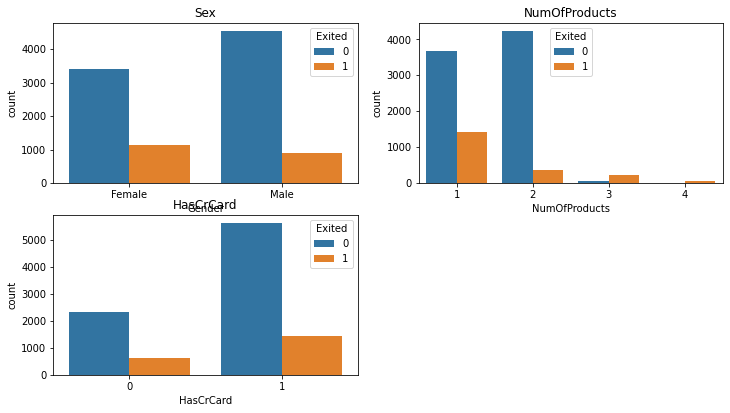

In [ ]:
#Bivariate
plt.figure(figsize=(12,10))
plt.subplot(321)
sns.countplot(data=df,x='Gender',hue='Exited')
plt.title("Sex")

plt.subplot(322)
sns.countplot(data=df,x='NumOfProducts',hue ='Exited')
plt.title("NumOfProducts")

plt.subplot(323)
sns.countplot(data=df,x='HasCrCard',hue='Exited')
plt.title("HasCrCard")



plt.show()

From the above plots we can observe that,the females are mostly liking to leave the bank,the customers who have purchased 1 product are liking to leave the bank and we can see that the customers who are having credit card are more likely to leave the bank.

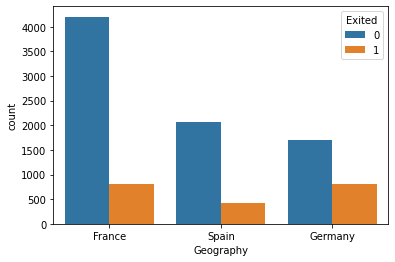

In [12]:
sns.countplot(data=df,x='Geography',hue='Exited')

From the plot,we can say that the germany and france has equal churned customers.

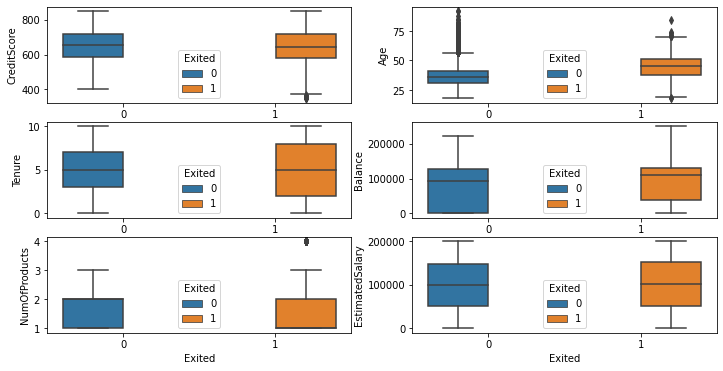

In [ ]:
#Distribution of all numeric columns with target variable
fig, axarr = plt.subplots(3, 2, figsize=(12,6))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])



1.   There is no much difference in the distribution of credit score among churned and retained customers.

2.   The customers with old age are more liking to leave the bank.

3.   The customers who have spended more time and less time both are liking to leave the company.

4.   The customers with sufficient balance are liking to leave the bank.it may cause loss to the bank.

5.   There is no difference in distribution of churned and retained customers with no.of preoducts and salary.






15


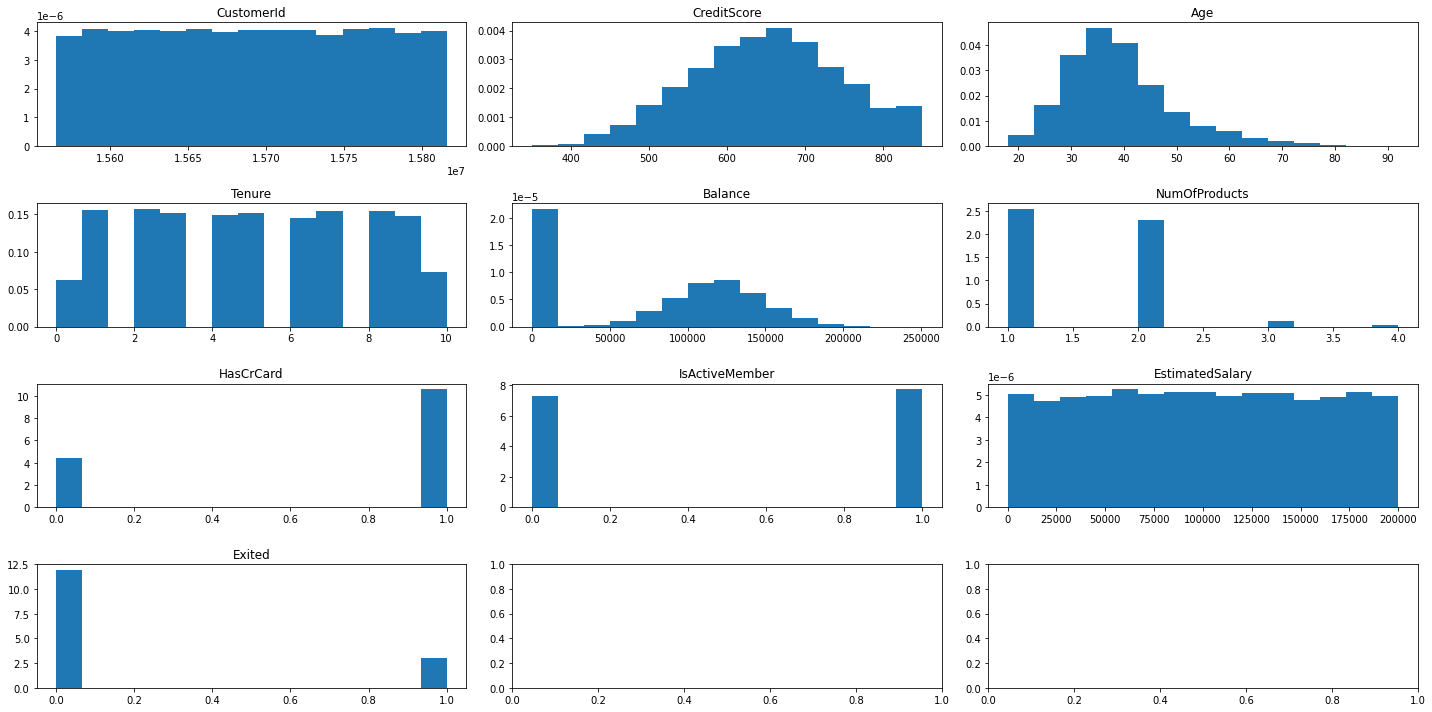

In [ ]:
# Histogram for all numeric cols
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
new_df = df.select_dtypes(include=numerics)
numeric_cols=new_df.columns
num_cols=3

#To decide on the bin size using Sturge’s rule
#bins=1+ceil(log2(n)) #research
  
bin_count = int(np.ceil(np.log2(len(new_df.axes[0]))) + 1)
n_bins = bin_count
print(n_bins)

# compute number of rows for plot 
num_rows= int(len(numeric_cols)/num_cols)+1
# setting canvas for plotting
fig, axs = plt.subplots(num_rows, num_cols, tight_layout=True,figsize=(20,10))
# plotting the numerical columns
for col, ax in zip(numeric_cols,axs.flatten()[:len(numeric_cols)]):
 ax.hist(new_df[col],bins=n_bins,density=True)
 ax.set_title(col)
plt.show()

From the above we can see that the data is not normally distributed.So,here we can go through minmax scaling.

--->Scaling

In [ ]:
df1.drop(['Exited'],axis=1,inplace=True)#Dropping target var


In [ ]:
df1.drop(['Surname'],axis=1,inplace=True)#dropping the names column

In [ ]:
# Feature Scaling:

scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df1.to_numpy()),columns=df1.columns)

In [ ]:
# adding target to scaled data
scaled_df['Churn'] = df['Exited']
scaled_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,0.538,0.0,0.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1
1,0.516,0.3,0.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0
2,0.304,0.0,0.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1
3,0.698,0.0,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0
4,1.000,0.3,0.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0


---> Heatmap

In [ ]:
corr = df.corr()

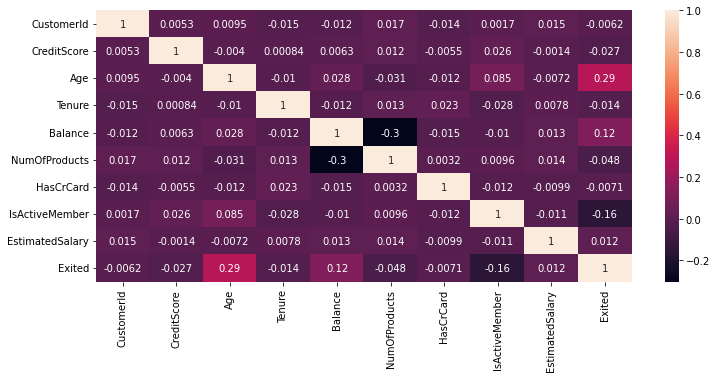

In [ ]:
plt.figure(figsize=(12,5))
sns.heatmap(corr,annot=True)
plt.show()

In [ ]:
#Ranking 
rank=pd.DataFrame(corr['Exited']).reset_index()
rank.rename(columns={'index':'names','Exited':'values'},inplace=True)
rank.sort_values(by='values',ascending=False,inplace=True)
rank

,names,values
9,Exited,1.000000
2,Age,0.285323
4,Balance,0.118533
8,EstimatedSalary,0.012097
0,CustomerId,-0.006248
6,HasCrCard,-0.007138
3,Tenure,-0.014001
1,CreditScore,-0.027094
5,NumOfProducts,-0.047820
7,IsActiveMember,-0.156128


---> target Variable : "Exited" ||
---> Independent Features  : age , balance , estimated salary , isactive , no.of products

**Splitting the data**

In [ ]:
x,y = scaled_df.iloc[:,:-1],scaled_df.iloc[:,-1]


In [ ]:
# splitting of data into train and test on 70:30

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=9)
x_train.shape,y_train.shape

((7000, 10), (7000,))

In [ ]:
y_train.value_counts(normalize=True) # The target is imblanced so let's take precision score in CV

0    0.796429
1    0.203571
Name: Churn, dtype: float64

**Modelling**


The choosen models are 5 : Logistic Regressio(LR),NaiveBase(NB),Decision Tree(DT),Random forest(RF),Adaboost(AD).

---> Logistic Regression:

In [ ]:
model_LR = LogisticRegression().fit(x_train,y_train)
y_pred1 = model_LR.predict(x_test)

In [ ]:
# Accuracy of the training data set
train_accuracy = round(model_LR.score(x_train,y_train)*100,2)
train_accuracy

81.09

---> Naive Base Algorithm

In [ ]:
# NB
from sklearn.naive_bayes import GaussianNB 
model_NB = GaussianNB()
model_NB.fit(x_train,y_train)
y_pred2 = model_NB.predict(x_test)
print("Accuaracy on train dataset :",round(model_NB.score(x_train,y_train),2))

Accuaracy on train dataset : 0.83


---> Decision Tree Algorithm

In [ ]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier(max_depth=6,
 min_samples_split=5,
 max_leaf_nodes=10) # After max depth 6 the acc is cons
model_DT.fit(x_train,y_train)
y_pred3 = model_DT.predict(x_test)
print("Accuaracy on train dataset :",round(model_DT.score(x_train,y_train),2))


Accuaracy on train dataset : 0.86


---->Checking through gridsearch the best hyperparameters for Random Forest

In [ ]:
# Hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {'max_depth': [2,3,5,10,20],
 'min_samples_leaf': [5,10,20,50,100,200],
 'n_estimators': [10,25,30,50,100,200]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
 param_grid=params,
 cv = 4,
n_jobs=-1, verbose=1, scoring="accuracy")

In [ ]:
%%time
grid_search.fit(x_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits
CPU times: user 8.67 s, sys: 764 ms, total: 9.43 s
Wall time: 3min 21s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search.best_score_

0.8617142857142858

In [ ]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=50,
                       n_jobs=-1, random_state=42)

----> Random Forest Algorithm

In [ ]:
# random forest
model_Rf = RandomForestClassifier(random_state=42,min_samples_leaf=5, n_jobs=-1, max_depth=10, n_estimators=50, oob_score=True)
model_Rf.fit(x_train,y_train)
y_pred4 = model_Rf.predict(x_test)
print("Accuaracy on train dataset :",round(model_Rf.score(x_train,y_train),2))

Accuaracy on train dataset : 0.89


----> Adaboost Algorithm:

In [ ]:
# BOosting : Adaboost
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
model_AB = AdaBoostClassifier()
model_AB.fit(x_train,y_train)
y_pred5 = model_AB.predict(x_test)
print("Accuarcy :",round(model_AB.score(x_train,y_train),2))

Accuarcy : 0.86


**Cross Validation:**

In [ ]:
#CV for Logistic Regression
from sklearn.model_selection import RepeatedStratifiedKFold
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores1 = cross_val_score(model_LR, x, y, scoring='precision', cv=cv, n_jobs=-1, error_score='raise')
print( "LR :" ,round(n_scores1.mean(),2))

# Cv for Naive base:
n_scores2 = cross_val_score(model_NB, x, y, scoring='precision', cv=cv, n_jobs=-1, error_score='raise')
print( "NB :" ,round(n_scores2.mean(),2))

# Cv for Decision Tree:
n_scores3 = cross_val_score(model_DT, x, y, scoring='precision', cv=cv, n_jobs=-1, error_score='raise')
print( "DT :" ,round(n_scores3.mean(),2))

# Cv for Random Forest:
n_scores4 = cross_val_score(model_Rf, x, y, scoring='precision', cv=cv, n_jobs=-1, error_score='raise')
print( "RF :" ,round(n_scores4.mean(),2))

# Cv for Adaboost:
n_scores5 = cross_val_score(model_AB, x, y, scoring='precision', cv=cv, n_jobs=-1, error_score='raise')
print( "AB :" ,round(n_scores5.mean(),2))


LR : 0.61
NB : 0.74
DT : 0.74
RF : 0.8
AB : 0.72


Observation : here,by observing the precision accuracy of the all models,we can see that "Random Forest Model"  has the high precision accuracy when compared to other models.So,let's calculate the "ROC" scores of all the models in next step.

--->ROC

In [ ]:
roc1 = roc_auc_score(y_test, model_LR.predict_proba(x_test)[:,1])
roc2 = roc_auc_score(y_test, model_NB.predict_proba(x_test)[:,1])
roc3 = roc_auc_score(y_test, model_DT.predict_proba(x_test)[:,1])
roc4 = roc_auc_score(y_test, model_Rf.predict_proba(x_test)[:,1])
roc5 = roc_auc_score(y_test, model_AB.predict_proba(x_test)[:,1])

In [ ]:
print("ROC of LR :",round(roc1,2))
print("ROC of NB :",round(roc2,2))
print("ROC of DT :",round(roc3,2))
print("ROC of RF :",round(roc4,2))
print("ROC of AB :",round(roc5,2))

ROC of LR : 0.75
ROC of NB : 0.79
ROC of DT : 0.81
ROC of RF : 0.85
ROC of AB : 0.84


Observation : here,by observing the roc scores of all models we can conlude that the "Random Forest Model" would be the best model because of it's high roc score(0.85) by comparing to other models roc scores.

Now,lets see the Performance matrix for the "Random Forest Model" in next step.

---->Performance matrix:

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Confusion Matrix
print(confusion_matrix(y_test,y_pred1))
tn,fp,fn,tp = confusion_matrix(y_test,y_pred1).ravel()
print( "Logistic Regression :" ,tn,fp,fn,tp)

print(confusion_matrix(y_test,y_pred2))
tn,fp,fn,tp = confusion_matrix(y_test,y_pred2).ravel()
print( "Naive base :" ,tn,fp,fn,tp)

print(confusion_matrix(y_test,y_pred3))
tn,fp,fn,tp = confusion_matrix(y_test,y_pred3).ravel()
print("Decision Tree :",tn,fp,fn,tp)

print(confusion_matrix(y_test,y_pred4))
tn,fp,fn,tp = confusion_matrix(y_test,y_pred4).ravel()
print( "Random Forest :",tn,fp,fn,tp)

print(confusion_matrix(y_test,y_pred5))
tn,fp,fn,tp = confusion_matrix(y_test,y_pred5).ravel()
print("Adaboost :" ,tn,fp,fn,tp)

[[2319   69]
 [ 511  101]]
Logistic Regression : 2319 69 511 101
[[2323   65]
 [ 455  157]]
Naive base : 2323 65 455 157
[[2293   95]
 [ 344  268]]
Decision Tree : 2293 95 344 268
[[2322   66]
 [ 359  253]]
Random Forest : 2322 66 359 253
[[2262  126]
 [ 313  299]]
Adaboost : 2262 126 313 299


In [ ]:
# Logistic Regression
print("accuracy :",round(accuracy_score(y_test,y_pred1),2))
print("recall :",round(recall_score(y_test,y_pred1),2))
print("f1_score :",round(f1_score(y_test,y_pred1),2))
print("precision :",round(precision_score(y_test,y_pred1),2))

accuracy : 0.81
recall : 0.17
f1_score : 0.26
precision : 0.59


In [ ]:
# Naive base
print("accuracy :",round(accuracy_score(y_test,y_pred2),2))
print("recall :",round(recall_score(y_test,y_pred2),2))
print("f1_score :",round(f1_score(y_test,y_pred2),2))
print("precision :",round(precision_score(y_test,y_pred2),2))

accuracy : 0.83
recall : 0.26
f1_score : 0.38
precision : 0.71


In [ ]:
# Decision Tree
print("accuracy :",round(accuracy_score(y_test,y_pred3),2))
print("recall :",round(recall_score(y_test,y_pred3),2))
print("f1_score :",round(f1_score(y_test,y_pred3),2))
print("precision :",round(precision_score(y_test,y_pred3),2))

accuracy : 0.85
recall : 0.44
f1_score : 0.55
precision : 0.74


In [ ]:
# Random Forest
print("accuracy :",round(accuracy_score(y_test,y_pred4),2))
print("recall :",round(recall_score(y_test,y_pred4),2))
print("f1_score :",round(f1_score(y_test,y_pred4),2))
print("precision :",round(precision_score(y_test,y_pred4),2))


accuracy : 0.86
recall : 0.41
f1_score : 0.54
precision : 0.79


In [ ]:
# Adaboost
print("accuracy :",round(accuracy_score(y_test,y_pred5),2))
print("recall :",round(recall_score(y_test,y_pred5),2))
print("f1_score :",round(f1_score(y_test,y_pred5),2))
print("precision :",round(precision_score(y_test,y_pred5),2))

accuracy : 0.85
recall : 0.49
f1_score : 0.58
precision : 0.7


---> All scores in tabular form

In [ ]:

final_df = pd.DataFrame()

In [ ]:
final_df['Models']=['LR','NB','DT','RF','AB']
final_df['ROC_Score']=['0.75','0.79','0.81','0.85','0.84']
final_df['CV_Score'] = ['0.61','0.74','0.74','0.8','0.72']
final_df['Accuracy']=['0.81','0.83','0.85','0.86','0.5']
final_df['Recall']=['0.17','0.26','0.44','0.41','0.49']
final_df['f1'] = ['0.26','0.38','0.55','0.54','0.58']
final_df['Precision']=['0.59','0.71','0.74','0.79','0.7']

In [ ]:
final_df

,Models,ROC_Score,CV_Score,Accuracy,Recall,f1,Precision
0,LR,0.75,0.61,0.81,0.17,0.26,0.59
1,NB,0.79,0.74,0.83,0.26,0.38,0.71
2,DT,0.81,0.74,0.85,0.44,0.55,0.74
3,RF,0.85,0.8,0.86,0.41,0.54,0.79
4,AB,0.84,0.72,0.5,0.49,0.58,0.7


Where 

*   LR : Logistic Regression
*   NB : NaiveBase
*   DT : Decision Tree
*   RF : RandomForest
*   AB : Adaboost








**Conclusion**: Here only aim is to get the good prediction of churned cutsomers.So,here recall and precision scores are most important performance metric rather than accuarcy.

--->By observing the above data "Random Forest Model" has the high Roc score and cross validation score.so,here the Random Forest model will be the good model to predict churn custmers.

---> Visual Representation of ROC-AUC curve among diff models:

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.746
NB: ROC AUC=0.794
DT: ROC AUC=0.809
Rf: ROC AUC=0.848
AB: ROC AUC=0.840


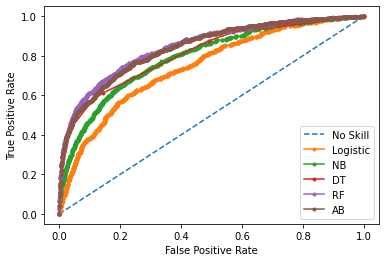

In [ ]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model_LR.predict_proba(x_test)
NB_prob = model_NB.predict_proba(x_test)
DT_prob = model_DT.predict_proba(x_test)
RF_prob = model_Rf.predict_proba(x_test)
AB_prob = model_AB.predict_proba(x_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
NB_prob = NB_prob[:, 1]
DT_prob = DT_prob[:, 1]
RF_prob = RF_prob[:, 1]
AB_prob = AB_prob[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
NB_auc = roc_auc_score(y_test, NB_prob)
DT_auc = roc_auc_score(y_test, DT_prob)
Rf_auc = roc_auc_score(y_test, RF_prob)
AB_auc = roc_auc_score(y_test, AB_prob)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
print('NB: ROC AUC=%.3f' % (NB_auc))
print('DT: ROC AUC=%.3f' % (DT_auc))
print('Rf: ROC AUC=%.3f' % (Rf_auc))
print('AB: ROC AUC=%.3f' % (AB_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, NB_prob)
dt_fpr, dt_tpr, _ = roc_curve(y_test, DT_prob)
rf_fpr, rf_tpr, _ = roc_curve(y_test, RF_prob)
ab_fpr, ab_tpr, _ = roc_curve(y_test, AB_prob)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.plot(nb_fpr, nb_tpr, marker='.', label='NB')
plt.plot(dt_fpr, dt_tpr, marker='.', label='DT')
plt.plot(rf_fpr, rf_tpr, marker='.', label='RF')
plt.plot(ab_fpr, ab_tpr, marker='.', label='AB')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show() 

**Final Conclusion :**
Finally,by observing the precision,roc-auc scores and visulaization we are able to say that random forest model will be a good model when comapred to other models.By predicting the churned customers, bank was now able to work more on the schemes provided to customers and will be safe from loss.

From EDA we know that,the customers with old age and with sufficient balance are more likely to leave bank.It will be a loss to bank.so,by taking care of such things  the bank can take some steps to develop bussiness. 